In [2]:
# Based on https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

import cv2
import numpy as np
from IPython.display import clear_output, Image, display
from io import BytesIO
import PIL.Image

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    

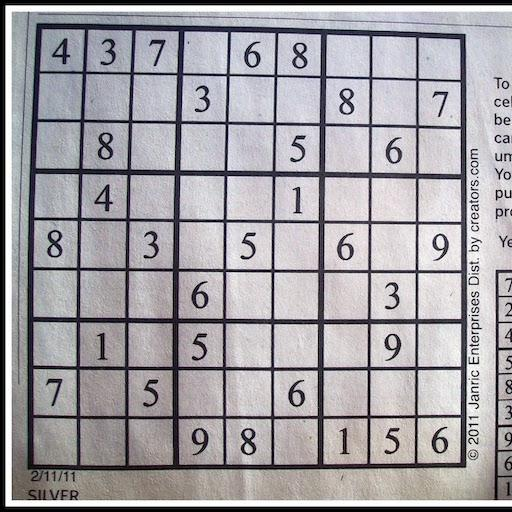

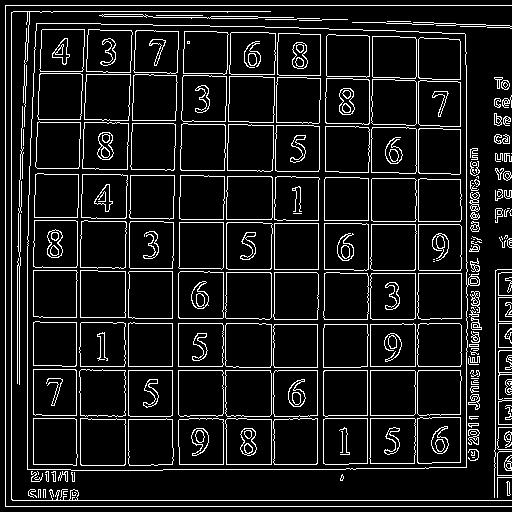

In [8]:
# Try Canny edge detection with no pre-filtering
img = cv2.imread("newspaper2.jpg")
showarray(img)
edges = cv2.Canny(img, 200,400)
showarray(edges)

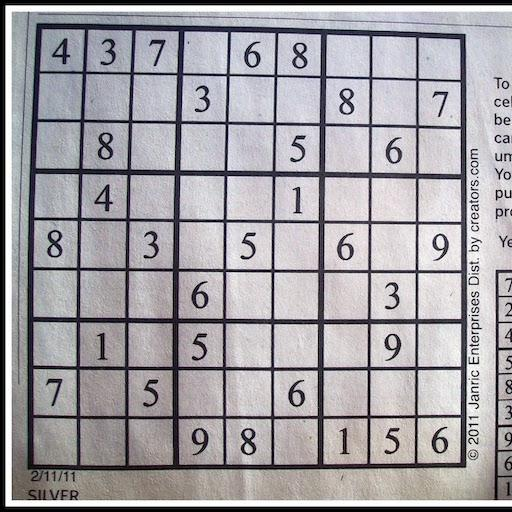

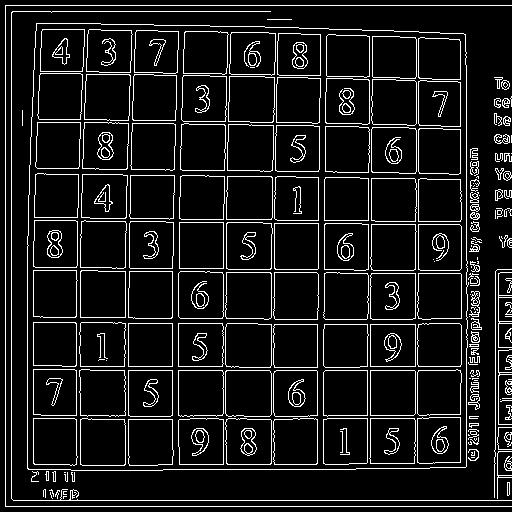

In [10]:
# Canny edge detection with bilateral filtering
img = cv2.imread("newspaper2.jpg")
showarray(img)
blur = cv2.bilateralFilter(img,9,150,150)
edges = cv2.Canny(blur,100,200)
showarray(edges)

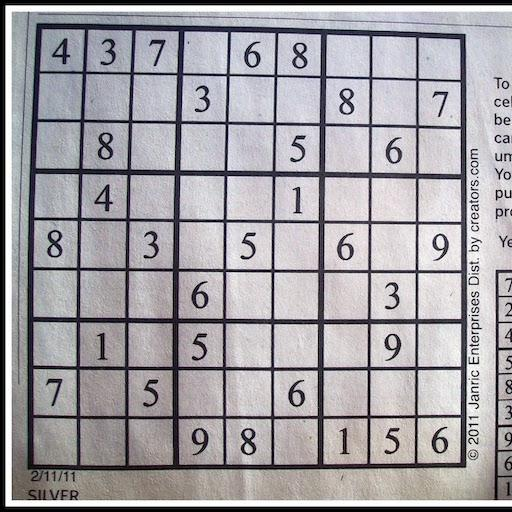

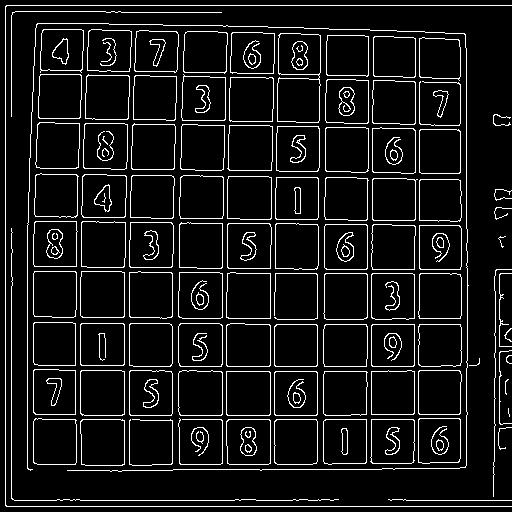

In [11]:
# Canny edge detection with downsampling then bilateral filtering first
img = cv2.imread("newspaper2.jpg")
showarray(img)
downsampled = cv2.pyrDown(img, dstsize=(img.shape[0]//2, img.shape[1]//2))
downsampled = cv2.pyrUp(downsampled, dstsize=(downsampled.shape[0]*2, downsampled.shape[1]*2))
blur = cv2.bilateralFilter(downsampled,9,150,150)
edges = cv2.Canny(blur,100,200)
showarray(edges)

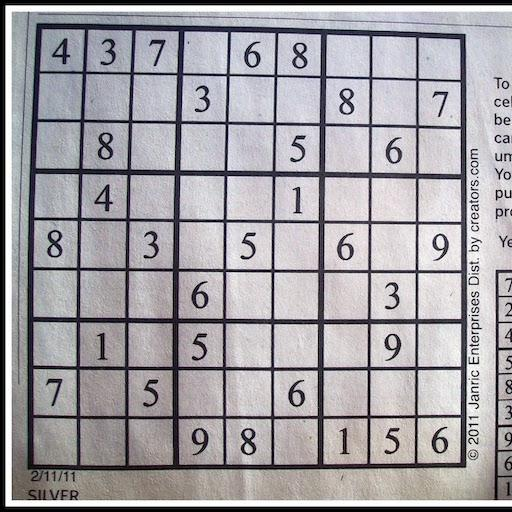

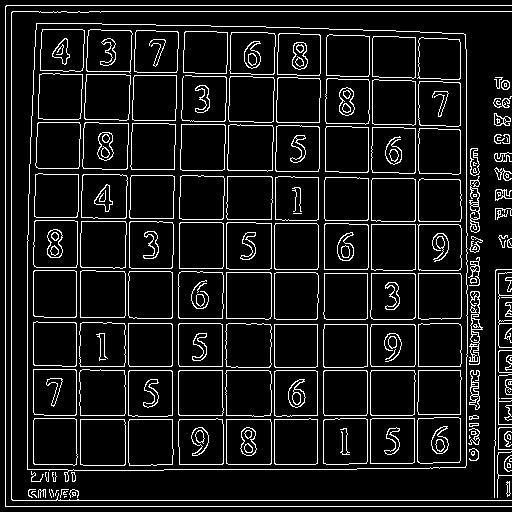

In [12]:
# Canny edge detection with downsampling then gaussian filtering first
img = cv2.imread("newspaper2.jpg")
showarray(img)
downsampled = cv2.pyrDown(img, dstsize=(img.shape[0]//2, img.shape[1]//2))
downsampled = cv2.pyrUp(downsampled, dstsize=(downsampled.shape[0]*2, downsampled.shape[1]*2))
blur = cv2.GaussianBlur(img,(5,5),0)
edges = cv2.Canny(blur,100,200)
showarray(edges)

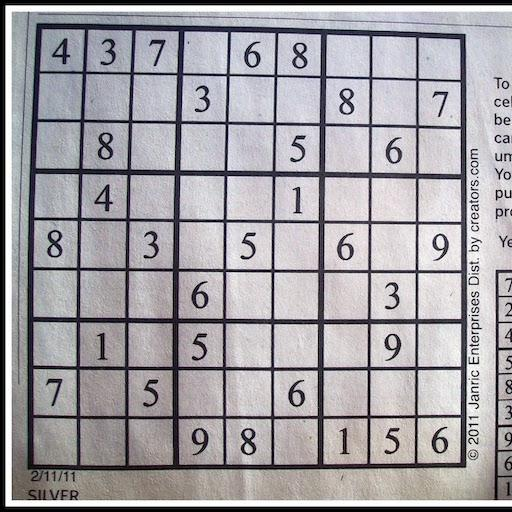

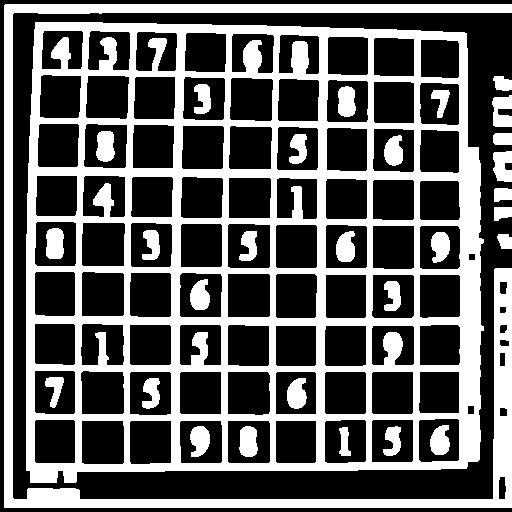

In [37]:
# Same as above, but add dilation and errosion
# Canny edge detection with downsampling then gaussian filtering first
img = cv2.imread("newspaper2.jpg")
showarray(img)
downsampled = cv2.pyrDown(img, dstsize=(img.shape[0]//2, img.shape[1]//2))
downsampled = cv2.pyrUp(downsampled, dstsize=(downsampled.shape[0]*2, downsampled.shape[1]*2))
blur = cv2.GaussianBlur(img,(5,5),0)
edges = cv2.Canny(blur,100,200)
dilate_kernel = np.ones((3,3),np.uint8)
erode_kernel = np.ones((5,5),np.uint8)
dilate = cv2.dilate(edges, dilate_kernel, iterations=3)
erode = cv2.erode(dilate, dilate_kernel, iterations=2)
showarray(erode)